In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
datapath = '../../../data/radar-tests/cr-moving/'
recData = np.load(datapath + 'recording.npy') # frame, txrx, step
cfg = np.load(datapath + 'config.npy', allow_pickle=True).item()

In [3]:
nfft = cfg['nfft']
dist_vec = cfg['dist_vec']

Text(0, 0.5, 'Range (m)')

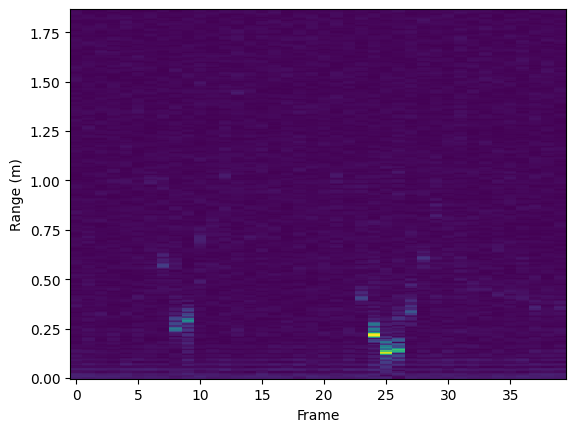

In [4]:
rp = np.fft.ifft(recData[:, 0, :], n=nfft, axis=1)
frame_cutoff = 40
range_cutoff = 300
plt.pcolormesh(np.arange(frame_cutoff), dist_vec[:range_cutoff], np.abs(rp[:frame_cutoff, :range_cutoff]).T)
plt.xlabel('Frame')
plt.ylabel('Range (m)')

Text(0, 0.5, 'Range bin (m)')

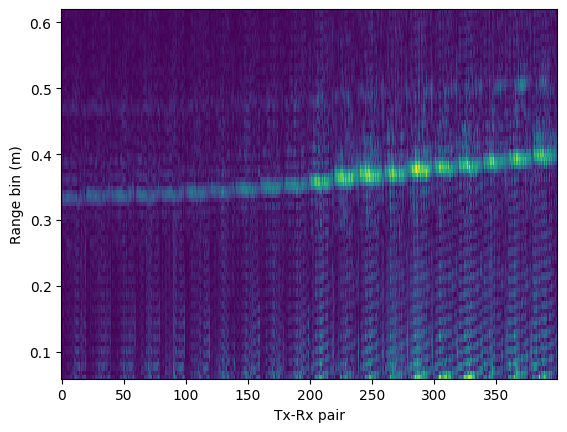

In [6]:
# Inside one frame, range-profile for every tx-rx pair
# recData = np.load('../../../data/radar-tests/0.9m-cr/recording.npy') # frame, txrx, step

target_frame = 27
rp_single_frame = np.fft.ifft(recData[target_frame, :, :], n=nfft, axis=1)
range_start = 10
range_end = 100
rp_single_frame = rp_single_frame[:, range_start:range_end]
plt.pcolormesh(np.arange(400), dist_vec[range_start:range_end], np.abs(rp_single_frame.T))
plt.xlabel('Tx-Rx pair')
plt.ylabel('Range bin (m)')

Text(0.5, 1.0, 'Max range bin for (Tx, Rx) pair colormap')

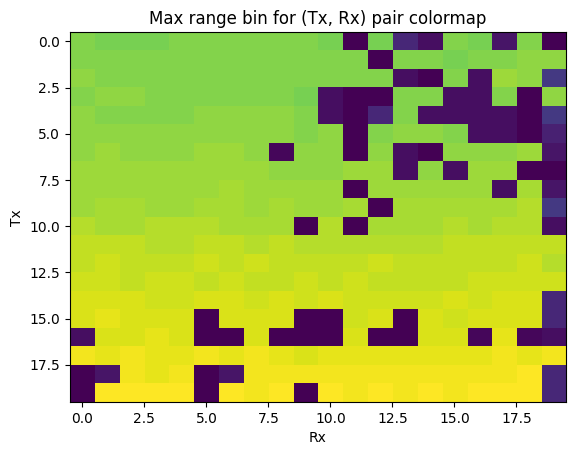

In [7]:
# For each tx-rx pair, max range bin index for frame 9
max_range_bin = np.argmax(np.abs(rp_single_frame), axis=1)
txrx_max_range = max_range_bin.reshape(20, -1)
plt.imshow(txrx_max_range, aspect='auto')
plt.xlabel('Rx')
plt.ylabel('Tx')
plt.title('Max range bin for (Tx, Rx) pair colormap')


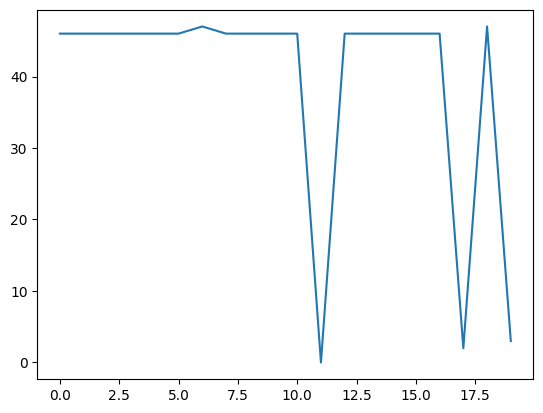

In [8]:
plt.plot(np.abs(txrx_max_range[8]))

Text(0.5, 0, 'Frequency (Hz)')

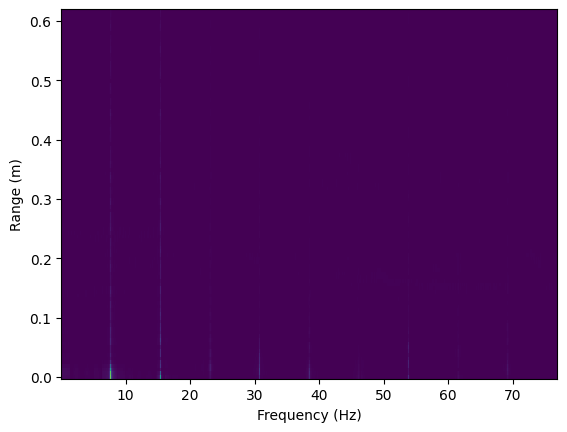

In [11]:
txData = np.reshape(recData, (recData.shape[0] * 20, 20, recData.shape[2]))
txData = txData[:, 0, :] # frames * tx, steps
rp_tx = np.fft.ifft(txData, axis=1, n=nfft) # frames, range bins

nfft_tx_doppler = 4096
rd_tx = np.fft.fft(rp_tx, axis=0, n=nfft_tx_doppler) # doppler, range bins
fs_tx = 1 / (0.13 / 20)
freq_tx_vec = np.arange(nfft_tx_doppler) * fs_tx / nfft_tx_doppler
plt.pcolormesh(freq_tx_vec[1:nfft_tx_doppler//2], dist_vec[:100], np.abs(rd_tx[1:nfft_tx_doppler//2, :100].T))
plt.ylabel("Range (m)")
plt.xlabel("Frequency (Hz)")

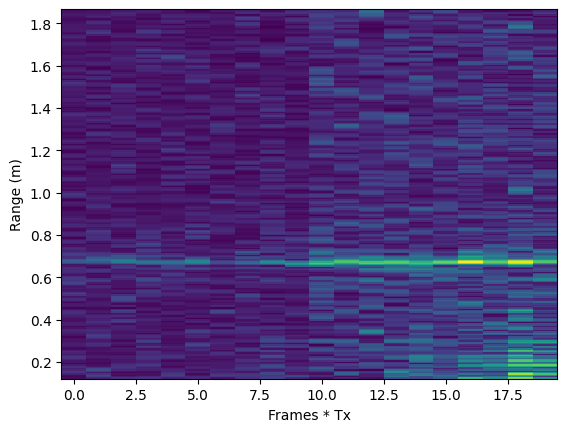

In [24]:
# Corner Reflector Test

def cr_reference():
    recData = np.load('../../../data/radar-tests/0.9m-cr/recording.npy') # frame, txrx, step
    txData = np.reshape(recData, (recData.shape[0] * 20, 20, recData.shape[2]))
    txData = txData[:, 0, :] # frames * tx, steps
    rp_tx = np.fft.ifft(txData, axis=1, n=nfft) # frames, range bins
    plt.pcolormesh(np.arange(20), dist_vec[20:300], np.abs(rp_tx[:20, 20:300].T))
    plt.ylabel("Range (m)")
    plt.xlabel("Frames * Tx")

    # nfft_tx_doppler = 4096
    # rd_tx = np.fft.fft(rp_tx, axis=0, n=nfft_tx_doppler) # doppler, range bins
    # fs_tx = 1 / (0.13 / 20)
    # freq_tx_vec = np.arange(nfft_tx_doppler) * fs_tx / nfft_tx_doppler
    # plt.pcolormesh(freq_tx_vec[1:nfft_tx_doppler//2], dist_vec[20:250], np.abs(rd_tx[1:nfft_tx_doppler//2, 20:250].T))
    # plt.ylabel("Range (m)")
    # plt.xlabel("Frequency (Hz)")

cr_reference()